# MANUAL NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
Cirrhosis = 'dataset/TRAIN/Cirrhosis'
Normal = 'dataset/TRAIN/Normal'
Numerous_septa_without_cirrhosis = 'dataset/TRAIN/Numerous septa without cirrhosis'
Portal_fibrosis_with_rare_septa = 'dataset/TRAIN/Portal fibrosis with rare septa'
Portal_fibrosis_without_septa='dataset/TRAIN/Portal fibrosis without septa'

In [4]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR Cirrhosis:

======== Images in:  dataset/TRAIN/Cirrhosis
Images_count :	 400
Min_width :	 449
Max_width :	 640
Min_height :	 464
Max_height :	 480



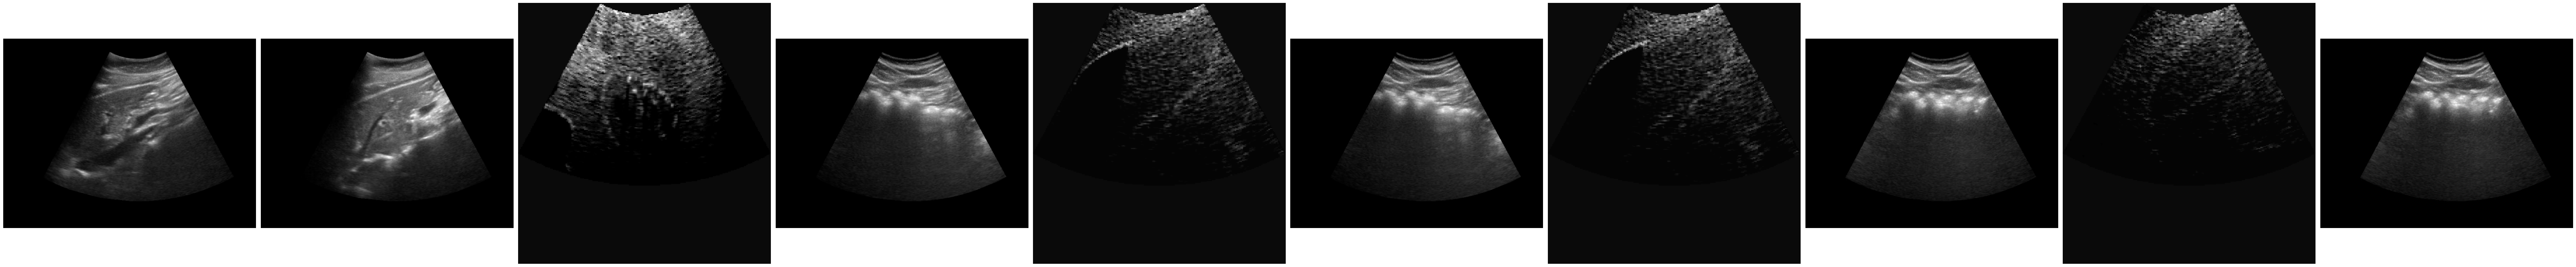

In [5]:
print("")
print("TRAINING DATA FOR Cirrhosis:")
print("")
images_details(Cirrhosis)
print("")
plot_images(Cirrhosis, 10) 


TRAINING DATA FOR Normal:

======== Images in:  dataset/TRAIN/Normal
Images_count :	 400
Min_width :	 640
Max_width :	 640
Min_height :	 480
Max_height :	 480



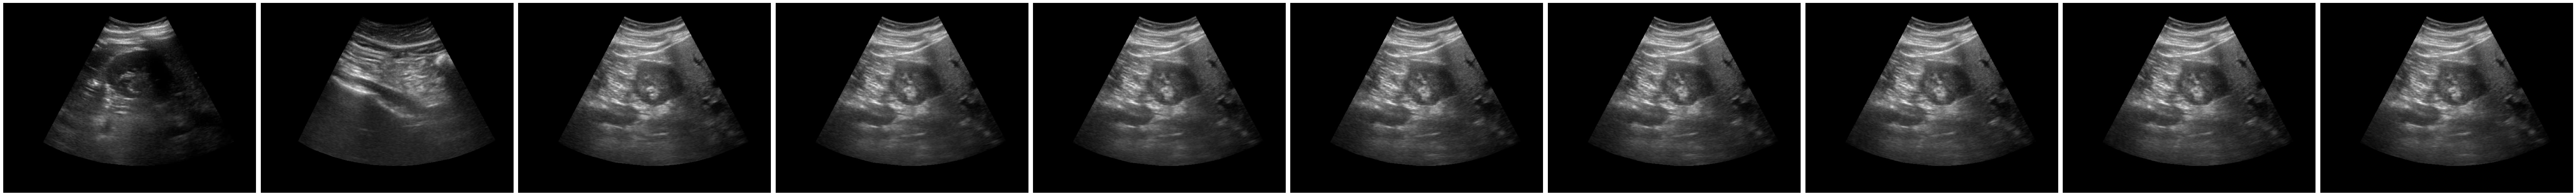

In [6]:
print("")
print("TRAINING DATA FOR Normal:")
print("")
images_details(Normal)
print("")
plot_images(Normal, 10)


TRAINING DATA FOR Numerous_septa_without_cirrhosis:

======== Images in:  dataset/TRAIN/Numerous septa without cirrhosis
Images_count :	 400
Min_width :	 449
Max_width :	 449
Min_height :	 464
Max_height :	 464



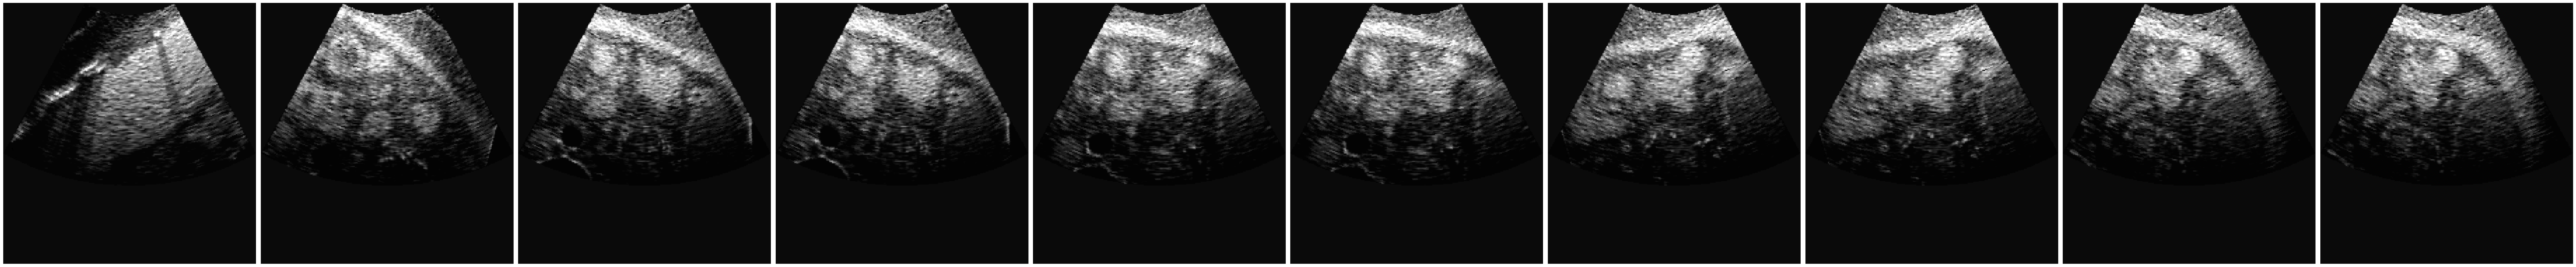

In [8]:
print("")
print("TRAINING DATA FOR Numerous_septa_without_cirrhosis:")
print("")
images_details(Numerous_septa_without_cirrhosis)
print("")
plot_images(Numerous_septa_without_cirrhosis, 10)


TRAINING DATA FOR Portal_fibrosis_with_rare_septa:

======== Images in:  dataset/TRAIN/Portal fibrosis with rare septa
Images_count :	 400
Min_width :	 449
Max_width :	 449
Min_height :	 464
Max_height :	 464



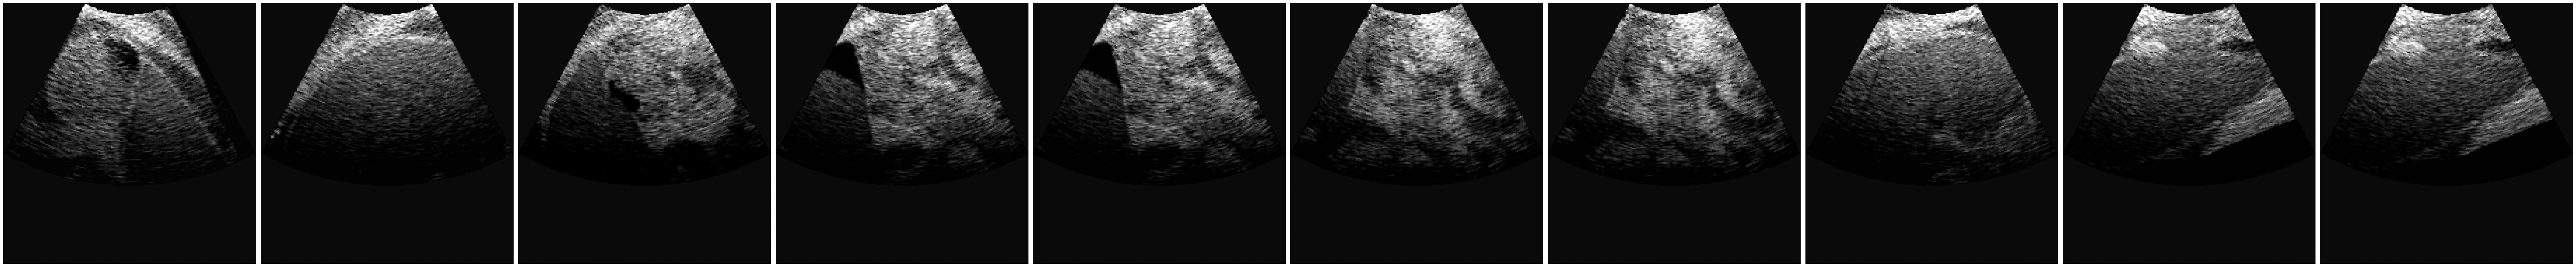

In [9]:
print("")
print("TRAINING DATA FOR Portal_fibrosis_with_rare_septa:")
print("")
images_details(Portal_fibrosis_with_rare_septa)
print("")
plot_images(Portal_fibrosis_with_rare_septa, 10)


TRAINING DATA FOR Portal_fibrosis_without_septa:

======== Images in:  dataset/TRAIN/Portal fibrosis without septa
Images_count :	 400
Min_width :	 449
Max_width :	 640
Min_height :	 464
Max_height :	 480



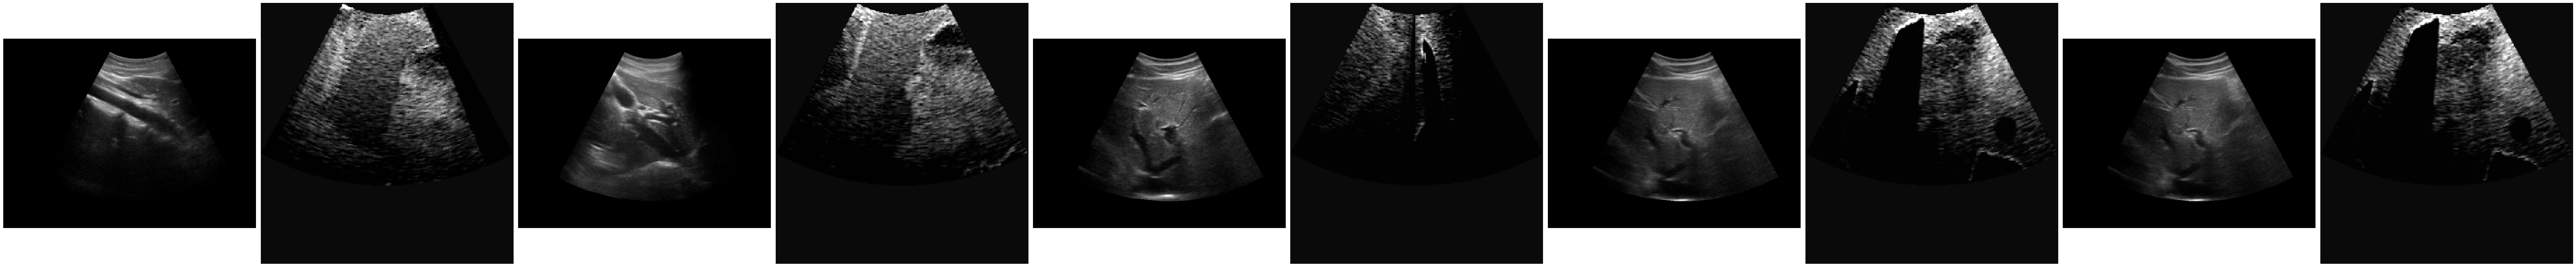

In [10]:
print("")
print("TRAINING DATA FOR Portal_fibrosis_without_septa:")
print("")
images_details(Portal_fibrosis_without_septa)
print("")
plot_images(Portal_fibrosis_without_septa, 10)

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/TRAIN',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2000 images belonging to 5 classes.


In [18]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/TEST',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1000 images belonging to 5 classes.


In [19]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(5, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [21]:
epochs = 10
batch_size = 512

In [22]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 7.2764 - accuracy: 0.2917
Epoch 1: accuracy improved from -inf to 0.29167, saving model to MANUAL.h5
3/3 [==============================] - 4s 1s/step - loss: 7.2764 - accuracy: 0.2917 - val_loss: 9.8008 - val_accuracy: 0.1562
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 4.8221 - accuracy: 0.2708
Epoch 2: accuracy did not improve from 0.29167
3/3 [==============================] - 3s 864ms/step - loss: 4.8221 - accuracy: 0.2708 - val_loss: 2.9240 - val_accuracy: 0.1875
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 2.0090 - accuracy: 0.2500
Epoch 3: accuracy did not improve from 0.29167
3/3 [==============================] - 3s 1s/step - loss: 2.0090 - accuracy: 0.2500 - val_loss: 1.3708 - val_accuracy: 0.2812
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 1.4308 - accuracy: 0.3333
Epoch 4: accuracy improved from 0.29167 to 0.33333, saving model to MANUAL.h5
3/3 

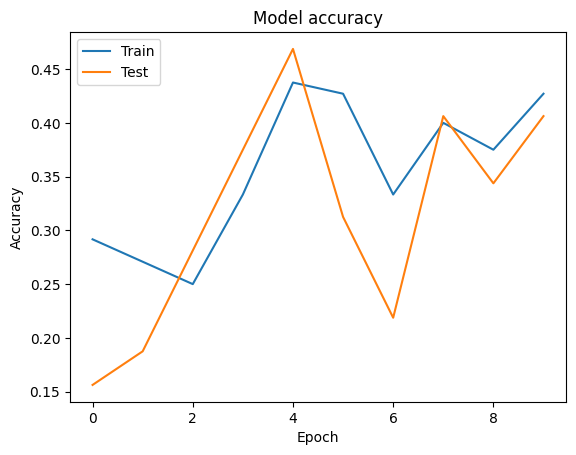

In [23]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

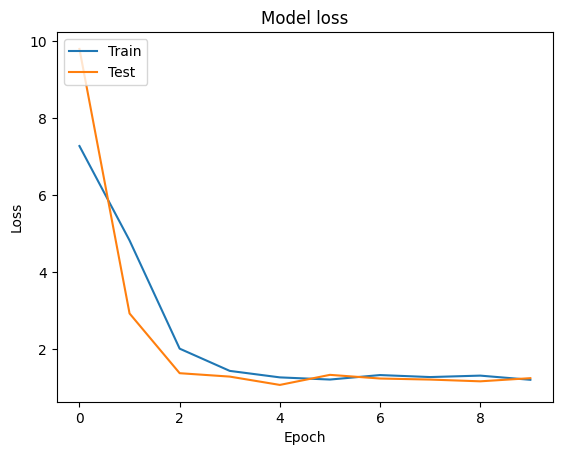

In [24]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()